# Implementación de una técnica de aprendizaje máquina sin el uso de un framework.

Frida Cano Falcón - A01752953

Para esta implementación se busca utilizar el modelo de regresión lineal que ayude a relacionar dos variables.

## Extracción de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/7mo Semestre/Machine Learning"
!ls

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Se busca predecir la relación entre los Proanthocyanis con el color del vino

## Antes de empezar
Lo primero que debemos hacer es cargar los datos (listas) y los valores iniciales de los hiper-parámetros. Para ello, debemos:

In [59]:
# columns has the name of each column.
columns = ["alcohol","malicAcid","Ash","AlcalinityOfAsh", "Magnesium","TotalPhenols","Flavanoids","NonflavanoidPhenols","Proanthocyanis","ColorIntensity","Hue","od280/od315","Proline"]
df = pd.read_csv('wine.data',names = columns)
df.head()

,alcohol,malicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanis,ColorIntensity,Hue,od280/od315,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 3
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alcohol              178 non-null    float64
 1   malicAcid            178 non-null    float64
 2   Ash                  178 non-null    float64
 3   AlcalinityOfAsh      178 non-null    float64
 4   Magnesium            178 non-null    int64  
 5   TotalPhenols         178 non-null    float64
 6   Flavanoids           178 non-null    float64
 7   NonflavanoidPhenols  178 non-null    float64
 8   Proanthocyanis       178 non-null    float64
 9   ColorIntensity       178 non-null    float64
 10  Hue                  178 non-null    float64
 11  od280/od315          178 non-null    float64
 12  Proline              178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 19.5 KB


Búsqueda de valores nulos

In [73]:
df.isnull().sum()

alcohol                0
malicAcid              0
Ash                    0
AlcalinityOfAsh        0
Magnesium              0
TotalPhenols           0
Flavanoids             0
NonflavanoidPhenols    0
Proanthocyanis         0
ColorIntensity         0
Hue                    0
od280/od315            0
Proline                0
dtype: int64

In [60]:
# Variable independiente - Proanthocyanis
x_data = df["malicAcid"]
# Variable dependiente - Color Intensity
y_data = df["ColorIntensity"]

Se grafica la distribución de los datos

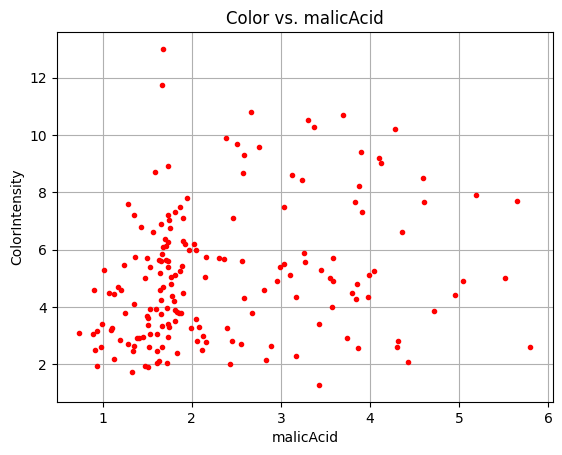

In [75]:
plt.plot(x_data,y_data,'.',color='r')
plt.grid()
plt.xlabel('malicAcid')
plt.ylabel('ColorIntensity')
plt.title('Color vs. malicAcid')
plt.show()

En cada iteración debemos calcular el valor de la derivada de la función de costo, que se obtiene a partir de los datos estimados, $h_\theta(x_i)$, y reales, $y_i$:

$\frac{∂J_{θ}}{∂θ_0} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$

$\frac{∂J_{θ}}{∂θ_1} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

## Pruebas
Realizaremos distintas pruebas para aproximar la ecuación de regresión lineal que mejor se ajuste a la distribución de datos, modificando las variables:


*   Θ (theta 0 y 1)
*   α (alpha)
*   Número de iteraciones




### Prueba 1


*   Θ0 = 1
*   Θ1 = 1
*   α = 0.20
*   it = 25

In [ ]:
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1,1]
# Cargar el valor del learning rate (alpha)
alpha = 0.20
# Crear función lambda para la función de hipótesis
h = lambda x, theta: theta[0] + theta[1]*x
# Calcular el total de muestras a partir de los datos (n)
n = len(x_data)
# Número de iteraciones
it = 25

In [ ]:
delta =[]
delta_2 = []
predic = []
data = []
for i in range(it):
  predic = []
  for xi, yi in zip(x_data,y_data):
    pred = h(xi, theta)
    delta.append(pred-yi)        # Calcular delta para theta0 y para cada muestra
    delta_2.append((pred-yi)*xi) # Calcular delta para theta1 y para cada muestra
    predic.append(pred)

  # Calcular sumatorias y promedio
  dJt0 = (1/n) * sum(delta)
  dJt1 = (1/n) * sum(delta_2)

  # Actualizar theta0
  theta[0] = theta[0] - alpha * dJt0;
  # Actualizar theta1
  theta[1] = theta[1] - alpha * dJt1;
  data.append(predic)

print(dJt0)
print(dJt1)

In [ ]:
plt.scatter(x_data,y_data)
plt.plot(x_data,data[len(data)-1],'r')
plt.grid()
plt.xlabel('Proanthocyanis')
plt.ylabel('ColorIntensity')
plt.title('Relación')
plt.show()

### Prueba 2

*   Θ0 = 1
*   Θ1 = 1
*   α = 0.4
*   it = 25

In [ ]:
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1,1]
# Cargar el valor del learning rate (alpha)
alpha = 0.4

In [ ]:
# Crear función lambda para la función de hipótesis
h = lambda x, theta: theta[0] + theta[1]*x
# Calcular el total de muestras a partir de los datos (n)
n = len(x_data)
# Número de iteraciones
it = 25

In [ ]:
delta =[]
delta_2 = []
predic = []
data = []
for i in range(it):
  predic = []
  for xi, yi in zip(x_data,y_data):
    pred = h(xi, theta)
    delta.append(pred-yi)        # Calcular delta para theta0 y para cada muestra
    delta_2.append((pred-yi)*xi) # Calcular delta para theta1 y para cada muestra
    predic.append(pred)

  # Calcular sumatorias y promedio
  dJt0 = (1/n) * sum(delta)
  dJt1 = (1/n) * sum(delta_2)

  # Actualizar theta0
  theta[0] = theta[0] - alpha * dJt0;
  # Actualizar theta1
  theta[1] = theta[1] - alpha * dJt1;
  data.append(predic)

print(dJt0)
print(dJt1)

In [ ]:
plt.scatter(x_data,y_data)
plt.plot(x_data,data[len(data)-1],'r')
plt.grid()
plt.xlabel('Proanthocyanis')
plt.ylabel('ColorIntensity')
plt.title('Relacion')
plt.show()

### Prueba 3


*   Θ0 = 1
*   Θ1 = 1
*   α = 0.40
*   it = 20




In [ ]:
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1,1]
# Cargar el valor del learning rate (alpha)
alpha = 0.4

# Crear función lambda para la función de hipótesis
h = lambda x, theta: theta[0] + theta[1]*x
# Calcular el total de muestras a partir de los datos (n)
n = len(x_data)
# Número de iteraciones
it = 20


delta =[]
delta_2 = []
predic = []
data = []
for i in range(it):
  predic = []
  for xi, yi in zip(x_data,y_data):
    pred = h(xi, theta)
    delta.append(pred-yi)        # Calcular delta para theta0 y para cada muestra
    delta_2.append((pred-yi)*xi) # Calcular delta para theta1 y para cada muestra
    predic.append(pred)

  # Calcular sumatorias y promedio
  dJt0 = (1/n) * sum(delta)
  dJt1 = (1/n) * sum(delta_2)

  # Actualizar theta0
  theta[0] = theta[0] - alpha * dJt0;
  # Actualizar theta1
  theta[1] = theta[1] - alpha * dJt1;
  data.append(predic)

print(dJt0)
print(dJt1)

Graficar

In [ ]:
plt.scatter(x_data,y_data)
plt.plot(x_data,data[len(data)-1],'r')
plt.grid()
plt.xlabel('Proanthocyanis')
plt.ylabel('ColorIntensity')
plt.title('Relacion')
plt.show()

### Prueba Final

*   Θ0 = 1
*   Θ1 = 1
*   α = 0.45
*   it = 20

In [ ]:
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1,1]
# Cargar el valor del learning rate (alpha)
alpha = 0.45

# Crear función lambda para la función de hipótesis
h = lambda x, theta: theta[0] + theta[1]*x
# Calcular el total de muestras a partir de los datos (n)
n = len(x_data)
# Número de iteraciones
it = 20


delta =[]
delta_2 = []
predic = []
data = []
for i in range(it):
  predic = []
  for xi, yi in zip(x_data,y_data):
    pred = h(xi, theta)
    delta.append(pred-yi)        # Calcular delta para theta0 y para cada muestra
    delta_2.append((pred-yi)*xi) # Calcular delta para theta1 y para cada muestra
    predic.append(pred)

  # Calcular sumatorias y promedio
  dJt0 = (1/n) * sum(delta)
  dJt1 = (1/n) * sum(delta_2)

  # Actualizar theta0
  theta[0] = theta[0] - alpha * dJt0;
  # Actualizar theta1
  theta[1] = theta[1] - alpha * dJt1;
  data.append(predic)

print(dJt0)
print(dJt1)

In [ ]:
plt.scatter(x_data,y_data)
plt.plot(x_data,data[len(data)-1],'r')
plt.grid()
plt.xlabel('Proanthocyanis')
plt.ylabel('ColorIntensity')
plt.title('Relacion')
plt.show()

### Entrenamiento de modelo con data set dividido

In [78]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [81]:
X_train.describe()

count    142.000000
mean       2.373521
std        1.143934
min        0.890000
25%        1.615000
50%        1.875000
75%        3.135000
max        5.800000
Name: malicAcid, dtype: float64

In [82]:
X_test.describe()

count    36.000000
mean      2.189722
std       1.005955
min       0.740000
25%       1.472500
50%       1.810000
75%       2.882500
max       4.600000
Name: malicAcid, dtype: float64

In [83]:
y_train.describe()

count    142.000000
mean       5.057606
std        2.330917
min        1.740000
25%        3.220000
50%        4.600000
75%        6.122500
max       13.000000
Name: ColorIntensity, dtype: float64

In [84]:
y_test.describe()

count    36.000000
mean      5.060000
std       2.300308
min       1.280000
25%       3.222500
50%       4.900000
75%       6.412500
max       9.899999
Name: ColorIntensity, dtype: float64

In [57]:
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1,1]
# Cargar el valor del learning rate (alpha)
alpha = 0.45

# Crear función lambda para la función de hipótesis
h = lambda x, theta: theta[0] + theta[1]*x
# Calcular el total de muestras a partir de los datos (n)
n = len(X_train)
# Número de iteraciones
it = 20


delta =[]
delta_2 = []
predic = []
data_predicts = []

for i in range(it):
  predic = []
  for xi, yi in zip(X_train,y_train):
    pred = h(xi, theta)
    delta.append(pred-yi)        # Calcular delta para theta0 y para cada muestra
    delta_2.append((pred-yi)*xi) # Calcular delta para theta1 y para cada muestra
    predic.append(pred)

  # Calcular sumatorias y promedio
  dJt0 = (1/n) * sum(delta)
  dJt1 = (1/n) * sum(delta_2)

  # Actualizar theta0
  theta[0] = theta[0] - alpha * dJt0;
  # Actualizar theta1
  theta[1] = theta[1] - alpha * dJt1;


print(dJt0)
print(dJt1)


2.8689497970783893
4.482570598582179


In [47]:
data_predicts = pd.DataFrame(predic)
print(data_predicts)

             0
0     6.616476
1    15.692843
2     5.170893
3     6.592778
4     6.189911
..         ...
137   6.213609
138   6.734967
139   7.066740
140   6.261005
141   8.441229

[142 rows x 1 columns]


In [66]:
# Suponiendo que X_train y X_test son listas unidimensionales
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
# Crear y entrenar el modelo de regresión
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Se obtienen las predicciones con el modelo obtenido
y_pred = modelo.predict(X_test)

# MSE, MAE y R^2
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('R^2: ', r2)

Mean Squared Error:  4.876133244017518
Mean Absolute Error:  1.836566400477926
R^2:  0.0521534281943129


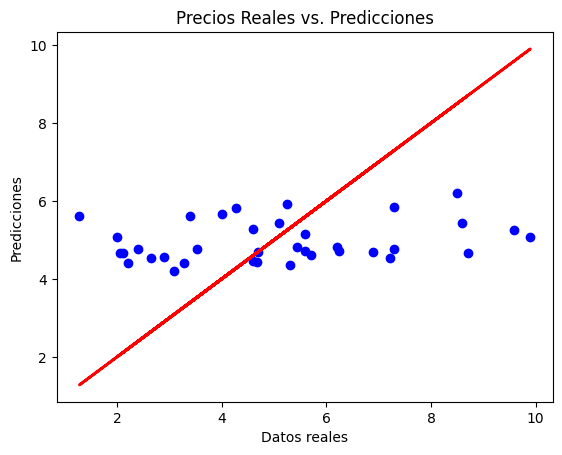

In [69]:
# Gráfica de dispersión con valores reales y los valores que se predijeron
plt.scatter(y_test, y_pred, color='blue', label='Datos de entrenamiento')

# Dibujar la línea de regresión
plt.plot(y_test, y_test, color='red', linewidth=2, label='Regresión Lineal')

# Etiquetas y título del gráfico
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.title(f'Precios Reales vs. Predicciones')

# Mostrar el gráfico
plt.show()

## Conclusiones

Visto que la distribución no sigue un comportamiento lineal, este modelo puede no ser el adecuado para predecir la intensidad del color del vino con el Proanthocyanis.

Más adelante se puede probar con otros modelos que se ajusten mejor o buscar otras variables que puedan justificar mejor la intensidad del color o talvez grupos de variables.